In [61]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("othership_schedule_data.xlsx")

In [49]:
df.head()

,Unnamed: 0,id,available_spot_count,capacity,start_datetime,location,start_time,utilization
0,0,33761,10,17,2024-11-18 07:00:00,Adelaide,07:00 AM,0.411765
1,1,33744,23,33,2024-11-18 07:00:00,Yorkville,07:00 AM,0.303030
2,2,33760,9,17,2024-11-18 07:30:00,Adelaide,07:30 AM,0.470588
3,3,33735,29,33,2024-11-18 07:30:00,Yorkville,07:30 AM,0.121212
4,4,33759,16,17,2024-11-18 08:00:00,Adelaide,08:00 AM,0.058824


In [50]:
df.dtypes

Unnamed: 0                       int64
id                               int64
available_spot_count             int64
capacity                         int64
start_datetime          datetime64[ns]
location                        object
start_time                      object
utilization                    float64
dtype: object

In [51]:
# Convert to datetime and sort
df["start_time_dt"] = pd.to_datetime(df["start_time"])
df["time_only"] = df["start_time_dt"].dt.strftime("%H:%M")
df = df.sort_values("time_only")
df.head()

C:\Users\Julian\AppData\Local\Temp\ipykernel_31852\1419908042.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["start_time_dt"] = pd.to_datetime(df["start_time"])


,Unnamed: 0,id,available_spot_count,capacity,start_datetime,location,start_time,utilization,start_time_dt,time_only
5469,5469,42742,58,100,2025-05-09 06:30:00,Yorkville,06:30 AM,0.420000,2025-11-23 06:30:00,06:30
0,0,33761,10,17,2024-11-18 07:00:00,Adelaide,07:00 AM,0.411765,2025-11-23 07:00:00,07:00
2063,2063,37195,12,36,2025-01-24 07:00:00,Adelaide,07:00 AM,0.666667,2025-11-23 07:00:00,07:00
2064,2064,37181,42,64,2025-01-24 07:00:00,Yorkville,07:00 AM,0.343750,2025-11-23 07:00:00,07:00
10252,10252,49935,8,30,2025-09-03 07:00:00,Adelaide,07:00 AM,0.733333,2025-11-23 07:00:00,07:00


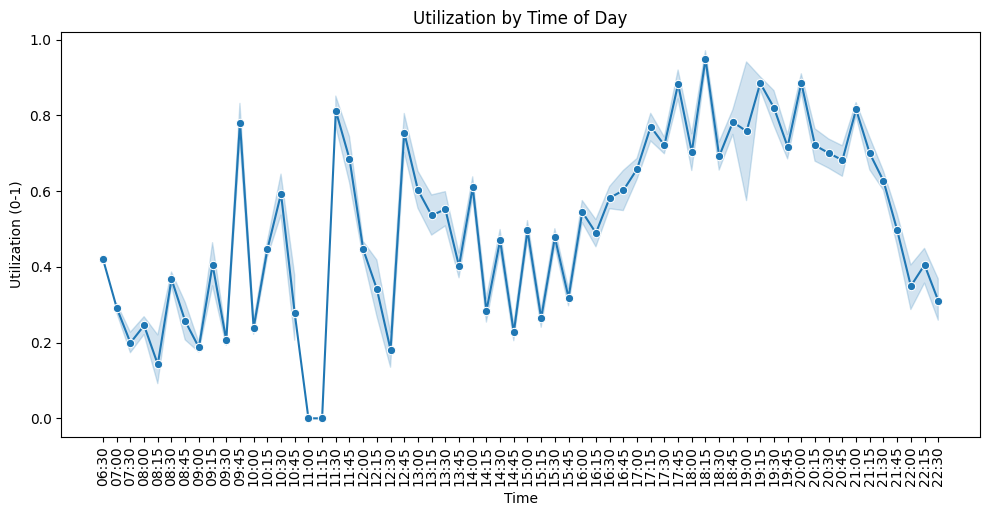

In [53]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="time_only", y="utilization", marker="o")

plt.title("Utilization by Time of Day")
plt.xlabel("Time")
plt.ylabel("Utilization (0-1)")
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


In [54]:
# Extract the hour
df['hour'] = df['start_datetime'].dt.hour
session_counts = df['hour'].value_counts().sort_index()
session_counts

hour
6        1
7      763
8      857
9     1032
10    1136
11     161
12     651
13     666
14    1208
15    1457
16    1116
17    1164
18     465
19     574
20     743
21    1384
22     217
Name: count, dtype: int64

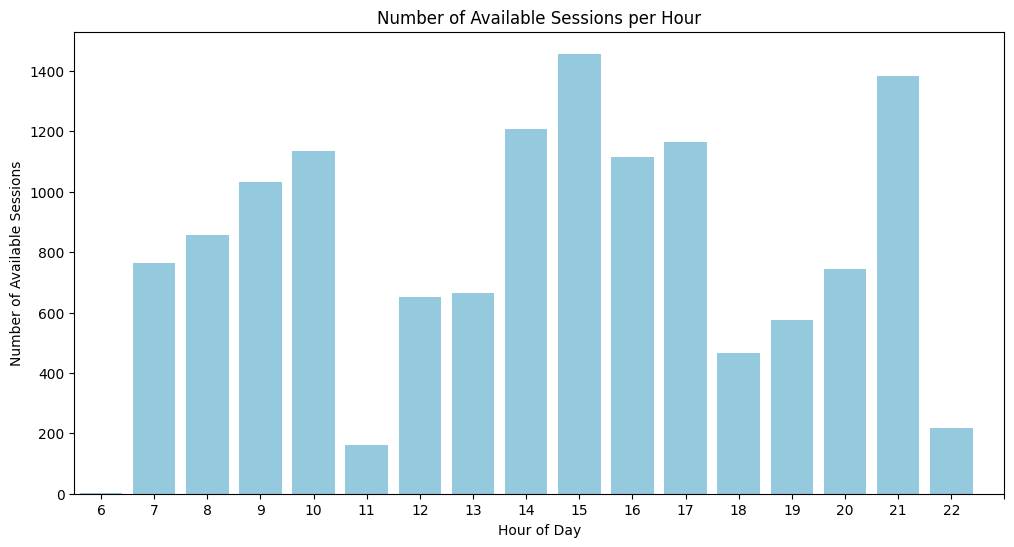

In [77]:
# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=session_counts.index, y=session_counts.values, color='skyblue')
plt.xticks(range(0,18))  # show all hours 0-23
plt.xlabel('Hour of Day')
plt.ylabel('Number of Available Sessions')
plt.title('Number of Available Sessions per Hour')
plt.show()

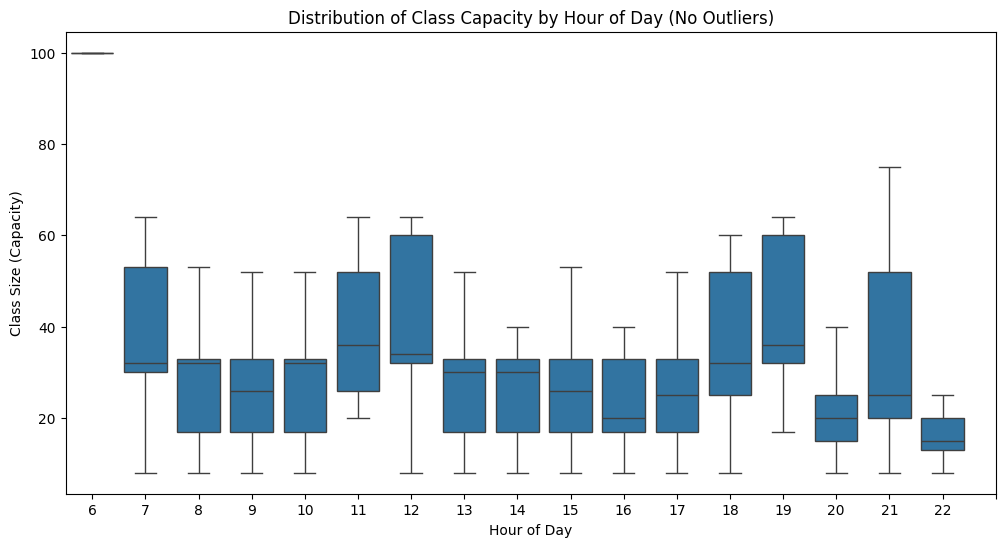

In [75]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="hour", y="capacity", showfliers=False)

plt.xlabel("Hour of Day")
plt.ylabel("Class Size (Capacity)")
plt.title("Distribution of Class Capacity by Hour of Day (No Outliers)")
plt.xticks(range(0,18))  # show all hours 0-23
plt.show()

In [105]:
df['month'] = pd.Categorical(
    df['start_datetime'].dt.month_name(),
    categories=[
        "January","February","March","April","May","June",
        "July","August","September","October","November","December"
    ],
    ordered=True
)

session_counts = df['month'].value_counts().sort_index()

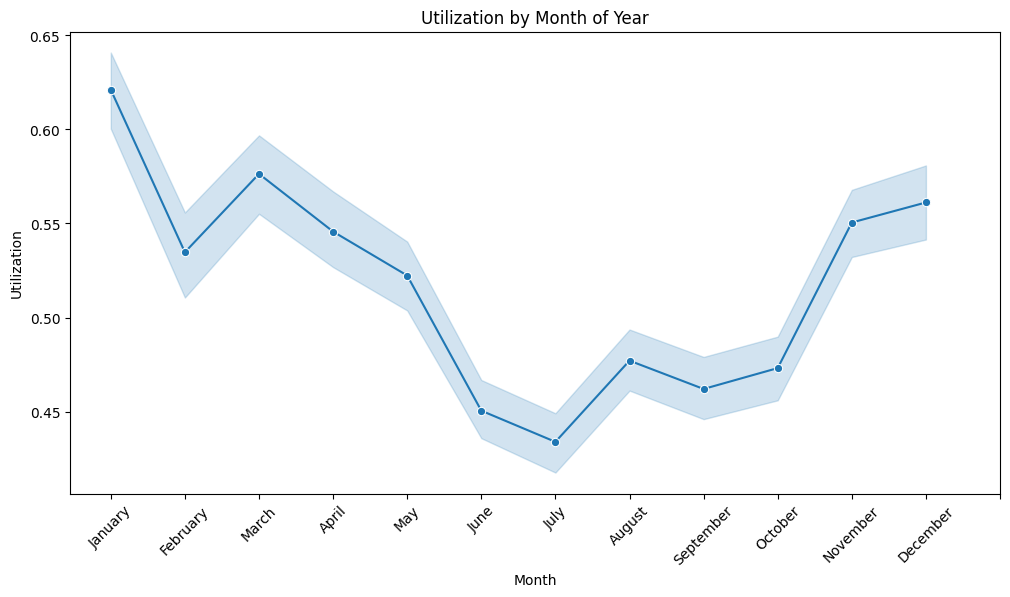

In [118]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="month", y="utilization", marker="o")
plt.title("Utilization by Month of Year")
plt.xlabel("Month")
plt.ylabel("Utilization")
plt.xticks(range(0,13))
plt.xticks(rotation=45)
plt.show()

In [111]:
df['day_of_week'] = pd.Categorical(
    df['start_datetime'].dt.day_name(),
    categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    ordered=True
)

session_counts = df['day_of_week'].value_counts().sort_index()
session_counts

day_of_week
Monday       1984
Tuesday      2033
Wednesday    1988
Thursday     1931
Friday       1928
Saturday     1767
Sunday       1964
Name: count, dtype: int64

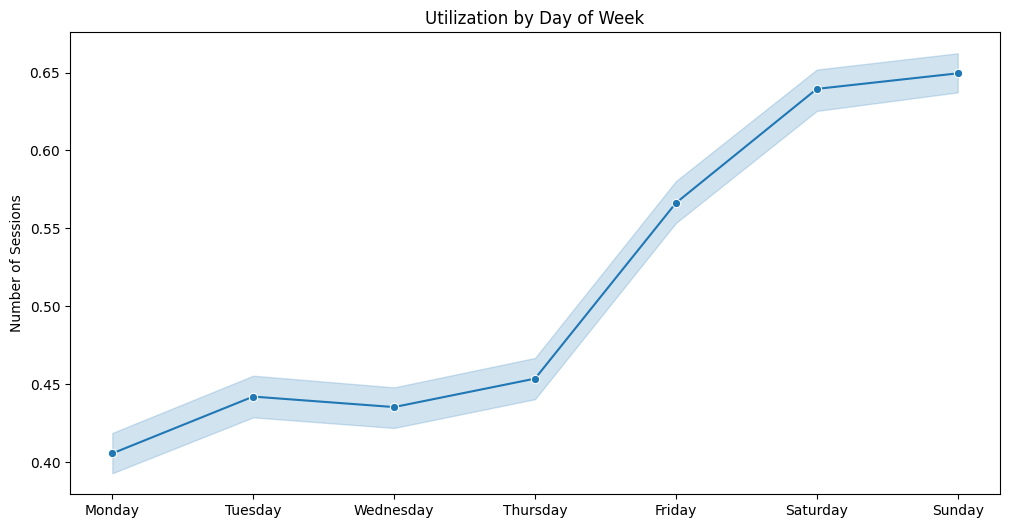

In [119]:

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='day_of_week', y='utilization', marker="o")
plt.title("Utilization by Day of Week")
plt.xlabel("")
plt.ylabel("Number of Sessions")
plt.show()

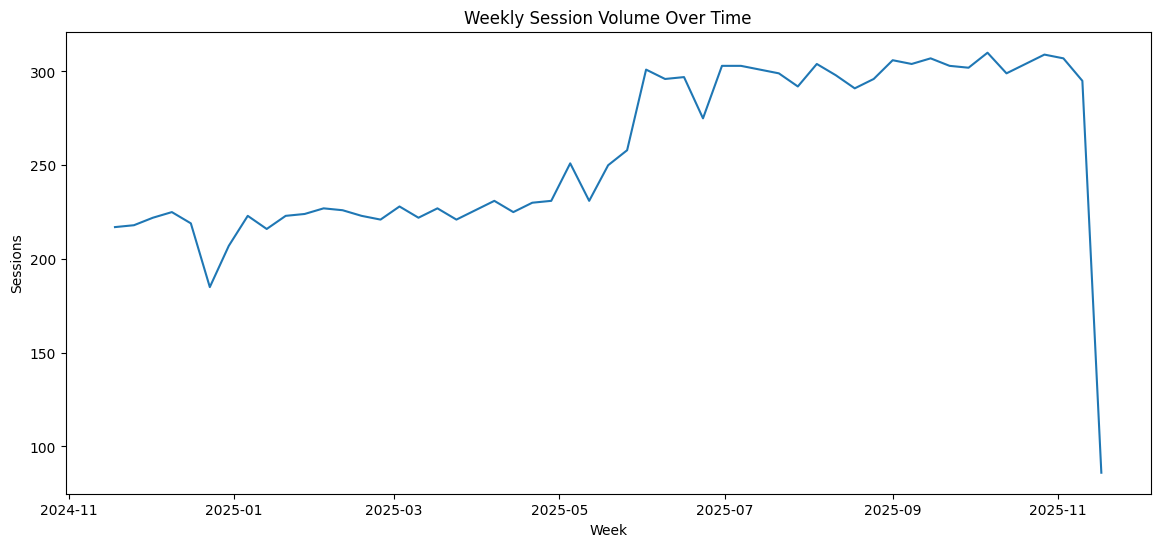

In [125]:
df['week'] = df['start_datetime'].dt.to_period('W').apply(lambda r: r.start_time)

sessions_weekly = df.groupby('week')['id'].count().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=sessions_weekly, x='week', y='id')
plt.title("Weekly Session Volume Over Time")
plt.xlabel("Week")
plt.ylabel("Sessions")
plt.show()